In [1]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
### 2. Prepare data ###

!scp '/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Car_Make_Ford_Toyota_Honda.zip' '/content/data.zip'
!unzip '/content/data.zip' -d '/content/'


Archive:  /content/data.zip
   creating: /content/data/
   creating: /content/data/test/
   creating: /content/data/test/ford/
  inflating: /content/data/test/ford/Ford back test image.jpeg  
  inflating: /content/data/test/ford/Ford front test image.jpeg  
   creating: /content/data/test/honda/
  inflating: /content/data/test/honda/2011_honda_accord_crosstour_rearview.jpg  
  inflating: /content/data/test/honda/2015-honda-fit-test-drive-around-ann-arbor-michigan-apr-2014_100463263_l.jpg  
   creating: /content/data/test/toyota/
  inflating: /content/data/test/toyota/toyota_front_test.jpeg  
  inflating: /content/data/test/toyota/toyota_rear_test.jpeg  
   creating: /content/data/train/
   creating: /content/data/train/ford/
  inflating: /content/data/train/ford/100.jpeg  
  inflating: /content/data/train/ford/19.jpeg  
  inflating: /content/data/train/ford/20.jpeg  
  inflating: /content/data/train/ford/21.jpeg  
  inflating: /content/data/train/ford/22.jpeg  
  inflating: /content/da

In [3]:
### 3. Install Ultralytics ###

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.6 MB/s eta 0:00:00


In [4]:

import os

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
### 4. Train model ###

import os

from ultralytics import YOLO


# Load a model
model = YOLO('yolo11n-cls.pt')  # load a pretained model

# Use the model

#This is the first train, with 35 epoch
#results = model.train(data= '/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Car_Make_Ford_Toyota_Honda.zip', epochs=35)

#This is the second train, with 30 epoch
#results = model.train(data= '/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Car_Make_Ford_Toyota_Honda.zip', epochs=30)  # train the model

#This is the Third train, with 48 epoch
results = model.train(data= '/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Car_Make_Ford_Toyota_Honda.zip', epochs=100)




Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Car_Make_Ford_Toyota_Honda.zip, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimi

In [6]:
### 5. Copy results ###

!scp -r /content/runs '/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make'

# Inference

In [7]:
from IPython.display import Image

In [ ]:
# Before showing the results, it seems that using the first train (35 epochs) resulted in a highest accuracy score of 0.37, which is not enough.
# After that, we then tried to lower the epoch if it would change things in the second. It did, but for the worse. We then went with 48 epochs in the third one.
# The third one (with 48 epochs) improved dramatically, it could clearly tell the ford in low res in the test images compared to the first and second train.

#10/17/2025
#The first train folder has been overridden by this new .ipynb file, where instead of 35 epochs with the first one
#it is 100 to see if the models has better accuracy this way instead.



image 1/1 /content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Ford back test image.jpeg: 224x224 ford 0.91, toyota 0.09, honda 0.00, 6.4ms
Speed: 4.4ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict4
Ford Rear Test:


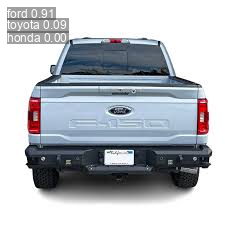


image 1/1 /content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/toyota_rear_test.jpeg: 224x224 toyota 0.97, ford 0.03, honda 0.00, 4.9ms
Speed: 4.1ms preprocess, 4.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict4
Toyota Rear Test:


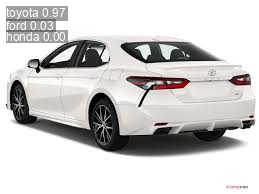


image 1/1 //content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/2011_honda_accord_crosstour_rearview.jpg: 224x224 honda 0.94, ford 0.06, toyota 0.00, 4.4ms
Speed: 6.9ms preprocess, 4.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict4
Honda Rear Test


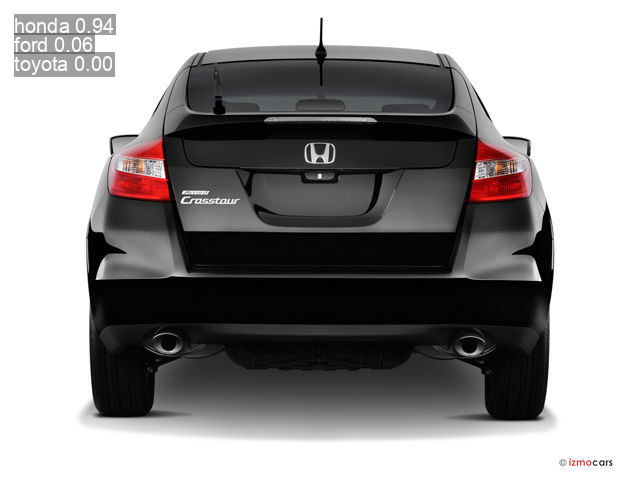


image 1/1 /content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Ford front test image.jpeg: 224x224 ford 0.60, toyota 0.40, honda 0.00, 5.6ms
Speed: 3.4ms preprocess, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict4
Ford Front Test:


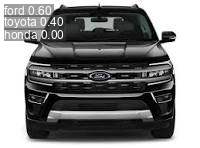


image 1/1 /content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/toyota_front_test.jpeg: 224x224 toyota 1.00, ford 0.00, honda 0.00, 6.4ms
Speed: 4.6ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict4
Toyota Front Test:


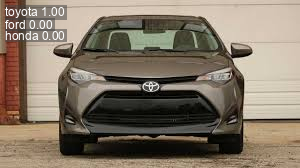


image 1/1 /content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/2015-honda-fit-test-drive-around-ann-arbor-michigan-apr-2014_100463263_l.jpg: 224x224 honda 1.00, toyota 0.00, ford 0.00, 6.5ms
Speed: 12.6ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict4
Honda Front Test


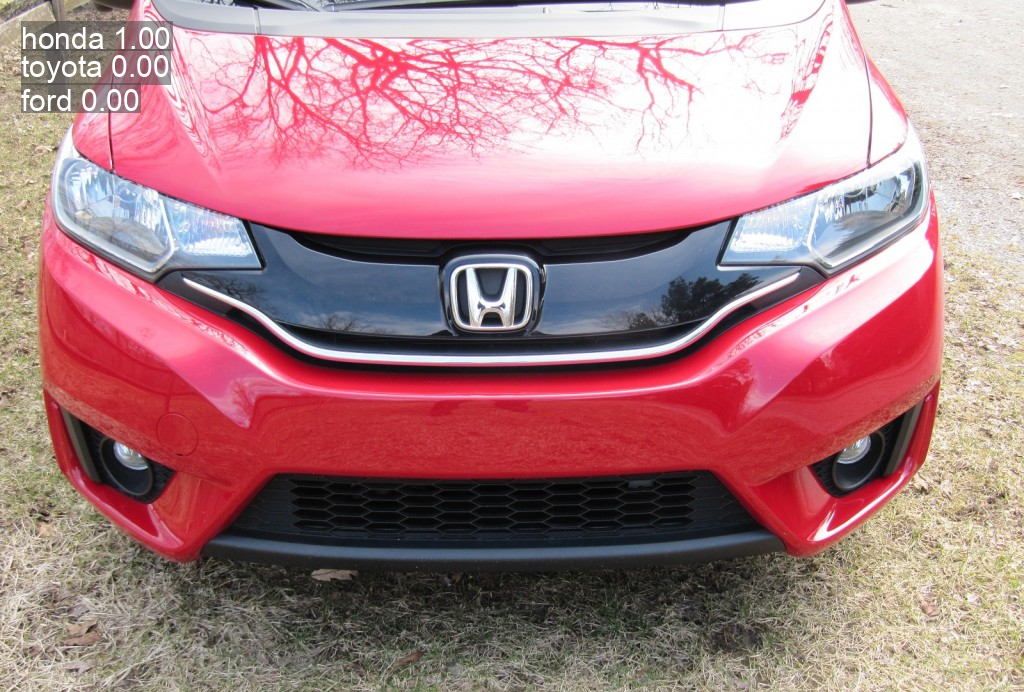

In [15]:


model = YOLO('/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/runs/classify/train/weights/best.pt')

#Rear Test for Ford
results_0 = model("/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Ford back test image.jpeg", save=True, conf=0.5)
print("Ford Rear Test:")
results_0[0].show()

#Rear Test for Toyota
results_1 = model("/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/toyota_rear_test.jpeg", save=True, conf=0.5)
print("Toyota Rear Test:")
results_1[0].show()

#Rear Test for Honda
results_2 = model("//content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/2011_honda_accord_crosstour_rearview.jpg", save=True, conf=0.5)
print("Honda Rear Test")
results_2[0].show()

results_3 = model("/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/Ford front test image.jpeg", save=True, conf=0.5)
print("Ford Front Test:")
results_3[0].show()

#Rear Test for Toyota
results_4 = model("/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/toyota_front_test.jpeg", save=True, conf=0.5)
print("Toyota Front Test:")
results_4[0].show()

#Rear Test for Honda
results_5 = model("/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/2015-honda-fit-test-drive-around-ann-arbor-michigan-apr-2014_100463263_l.jpg", save=True, conf=0.5)
print("Honda Front Test")
results_5[0].show()




In [16]:
import pandas as pd
path = "/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/runs/classify/train"
df = pd.read_csv(path + "/results.csv")

In [17]:
df.head()

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,12.0423,1.09717,0.26087,1,1.48763,0.000257,0.000257,0.000257
1,2,15.2110,0.56470,0.20290,1,2.44303,0.000523,0.000523,0.000523
2,3,20.9643,0.39559,0.17391,1,3.00911,0.000784,0.000784,0.000784
3,4,24.6281,0.27441,0.10145,1,5.35547,0.001040,0.001040,0.001040
4,5,28.3906,0.39703,0.15942,1,3.03320,0.001290,0.001290,0.001290


In [18]:
df['train/loss'].max()

1.09717

In [19]:
print("Best Top-1 Accuracy:", df['metrics/accuracy_top1'].max())

Best Top-1 Accuracy: 0.31884


In [20]:
print("Minimum Training Loss:", df['train/loss'].min())

Minimum Training Loss: 0.00945


In [21]:
print("Minimum Validation Loss:", df['val/loss'].min())

Minimum Validation Loss: 1.48763


In [22]:
from IPython.display import Image

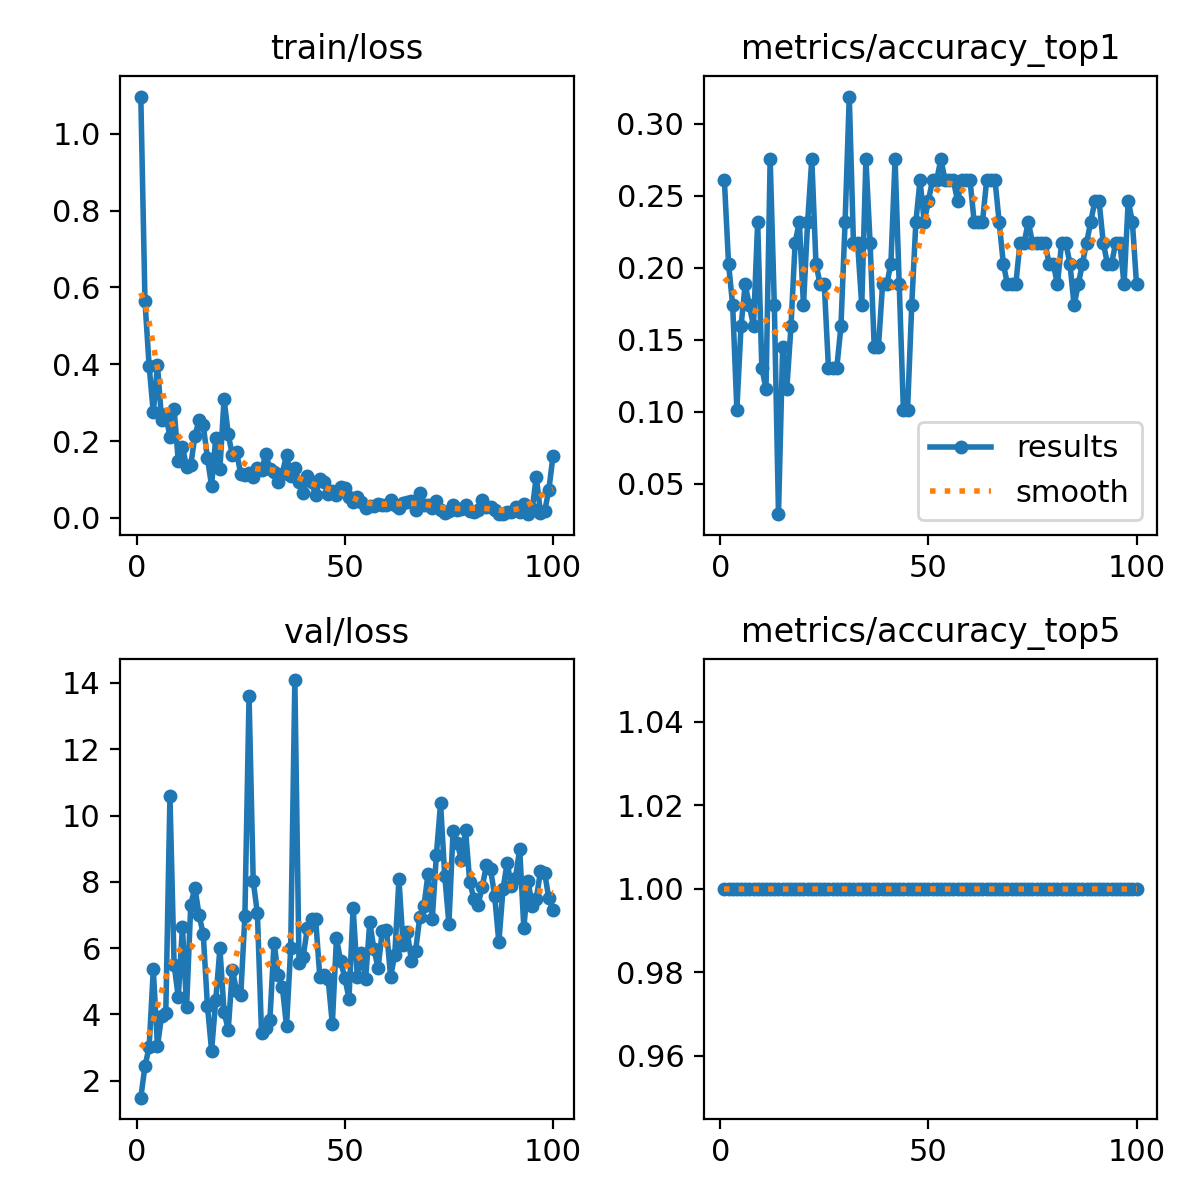

In [23]:
Image("/content/gdrive/MyDrive/Colab_Notebooks_Drones/GAP1_Composite_Car_Make/runs/classify/train/results.png", width=600)

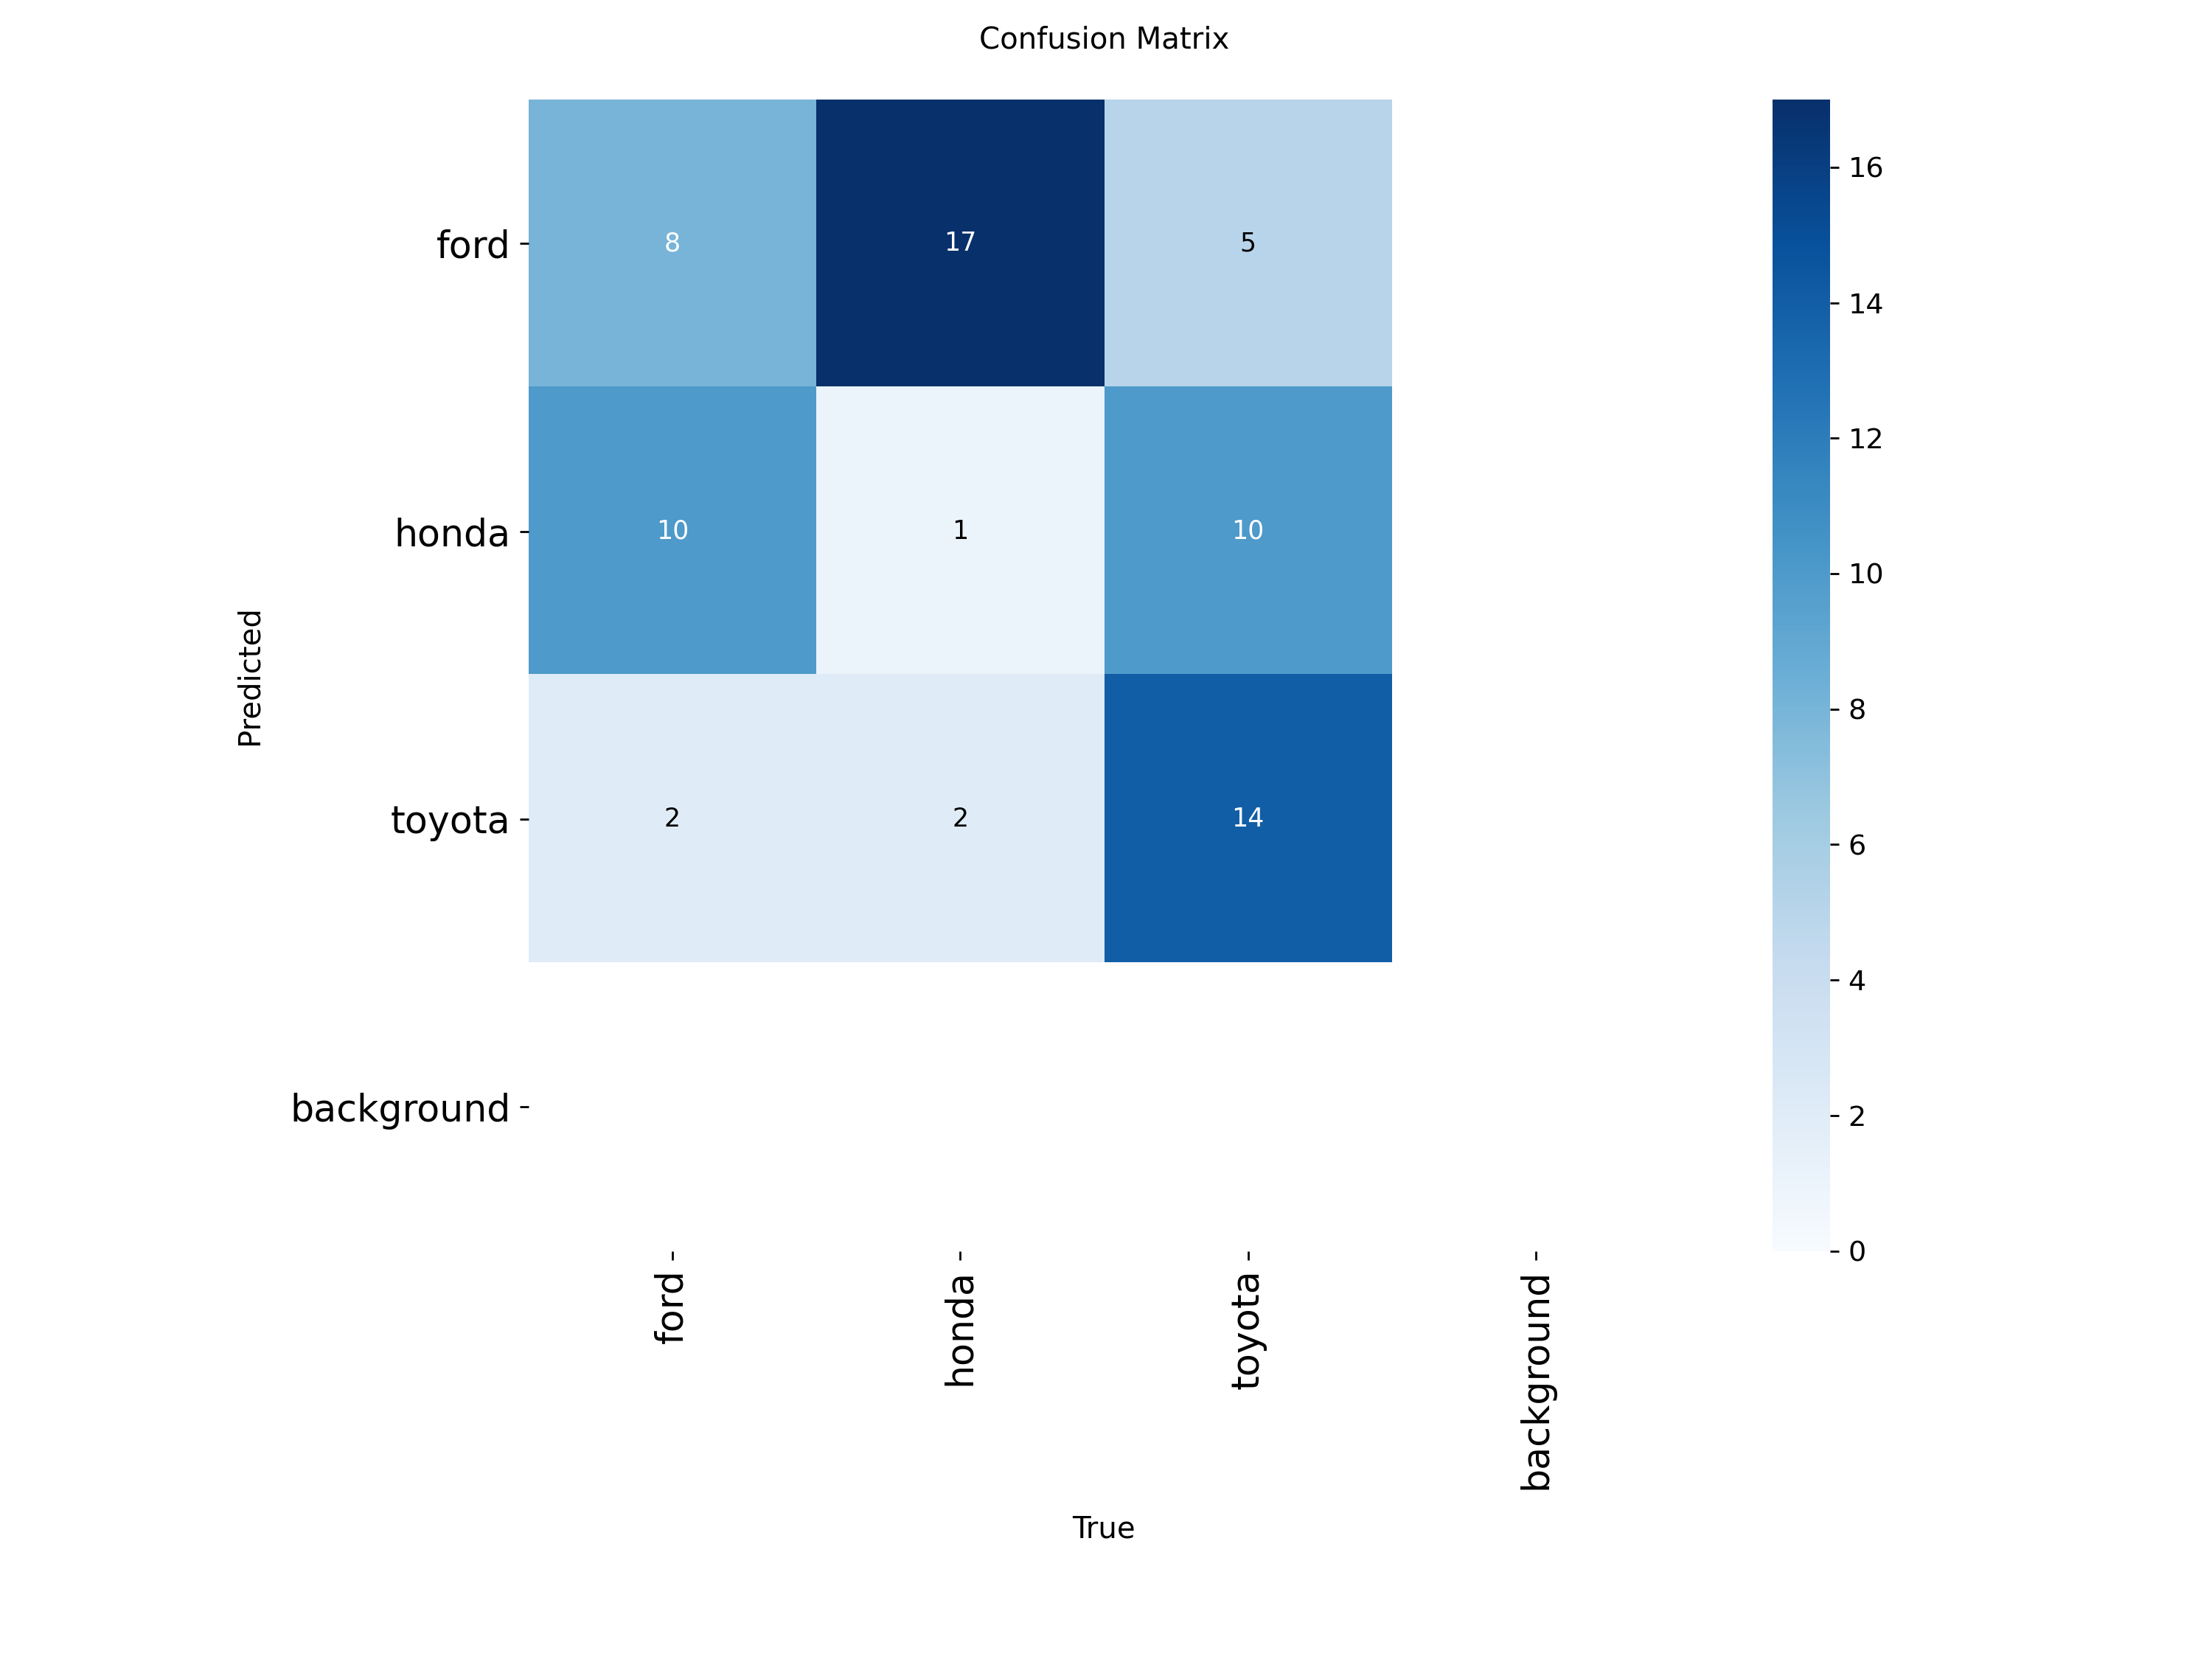

In [24]:
display(Image(filename=path + "/confusion_matrix.png"))